In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['pollution_india_2010 (1).csv']


In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data=pd.read_csv("../input/pollution_india_2010 (1).csv",na_values='Null')

In [11]:
data.head()

,City,NO2,PM10,SO2,State
0,Chitoor,9.0,39.0,4.0,Andhra Pradesh
1,Guntur,11.0,81.0,2.0,Andhra Pradesh
2,Hydrabad,24.0,79.0,5.0,Andhra Pradesh
3,Kothagudem,11.0,62.0,2.0,Andhra Pradesh
4,Kurnool,9.0,85.0,4.0,Andhra Pradesh


In [14]:
data.isnull().sum()

City     0
NO2      4
PM10     1
SO2      5
State    0
dtype: int64

In [15]:
data.shape

(181, 5)

In [17]:
data=data.dropna()

In [20]:
#Calculate pollution levels state-wise
data_pol=data.groupby('State',as_index=False)[['NO2','PM10','SO2']].agg(np.sum)

In [21]:
data_pol.head()

,State,NO2,PM10,SO2
0,Andhra Pradesh,183.0,893.0,60.0
1,Assam,177.0,834.0,74.0
2,Bihar,40.0,181.0,7.0
3,Chandigarh,16.0,92.0,2.0
4,Chattisgarh,86.0,502.0,37.0


In [22]:
#Function to scale the data to equilvalent Z-scores
def scale(x):
    return (x-np.mean(x))/np.std(x)
data_num=data_pol.drop("State",axis=1)
data_scaled=data_num.apply(scale,axis=1)

In [23]:
data_scaled.head()

,NO2,PM10,SO2
0,-0.532950,1.400923,-0.867973
1,-0.548580,1.403137,-0.854557
2,-0.477083,1.391492,-0.914409
3,-0.522653,1.399362,-0.876709
4,-0.586407,1.407697,-0.821290


In [24]:
#Alternate to perform scaling using in-built function
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
data_scaled=np.array(data_scaled)

**Ward Linkage**
With Ward's linkage method, the distance between two clusters is the sum of squared deviations from points to centroids. The objective of Ward's linkage is to minimize the within-cluster sum of squares. 

In [27]:
Z=linkage(data_scaled,method="ward")

**Dendogram**

The agglomerative hierarchical clustering algorithms available in this program module build a cluster hierarchy
that is commonly displayed as a tree diagram called a dendrogram. They begin with each object in a separate
cluster. At each step, the two clusters that are most similar are joined into a single new cluster. Once fused,
objects are never separated.

The horizontal axis of the dendrogram represents the distance or dissimilarity between clusters. The vertical axis
represents the objects and clusters. The dendrogram is fairly simple to interpret. Remember that our main interest
is in similarity and clustering. Each joining (fusion) of two clusters is represented on the graph by the splitting of
a horizontal line into two horizontal lines. The horizontal position of the split, shown by the short vertical bar,
gives the distance (dissimilarity) between the two clusters. 

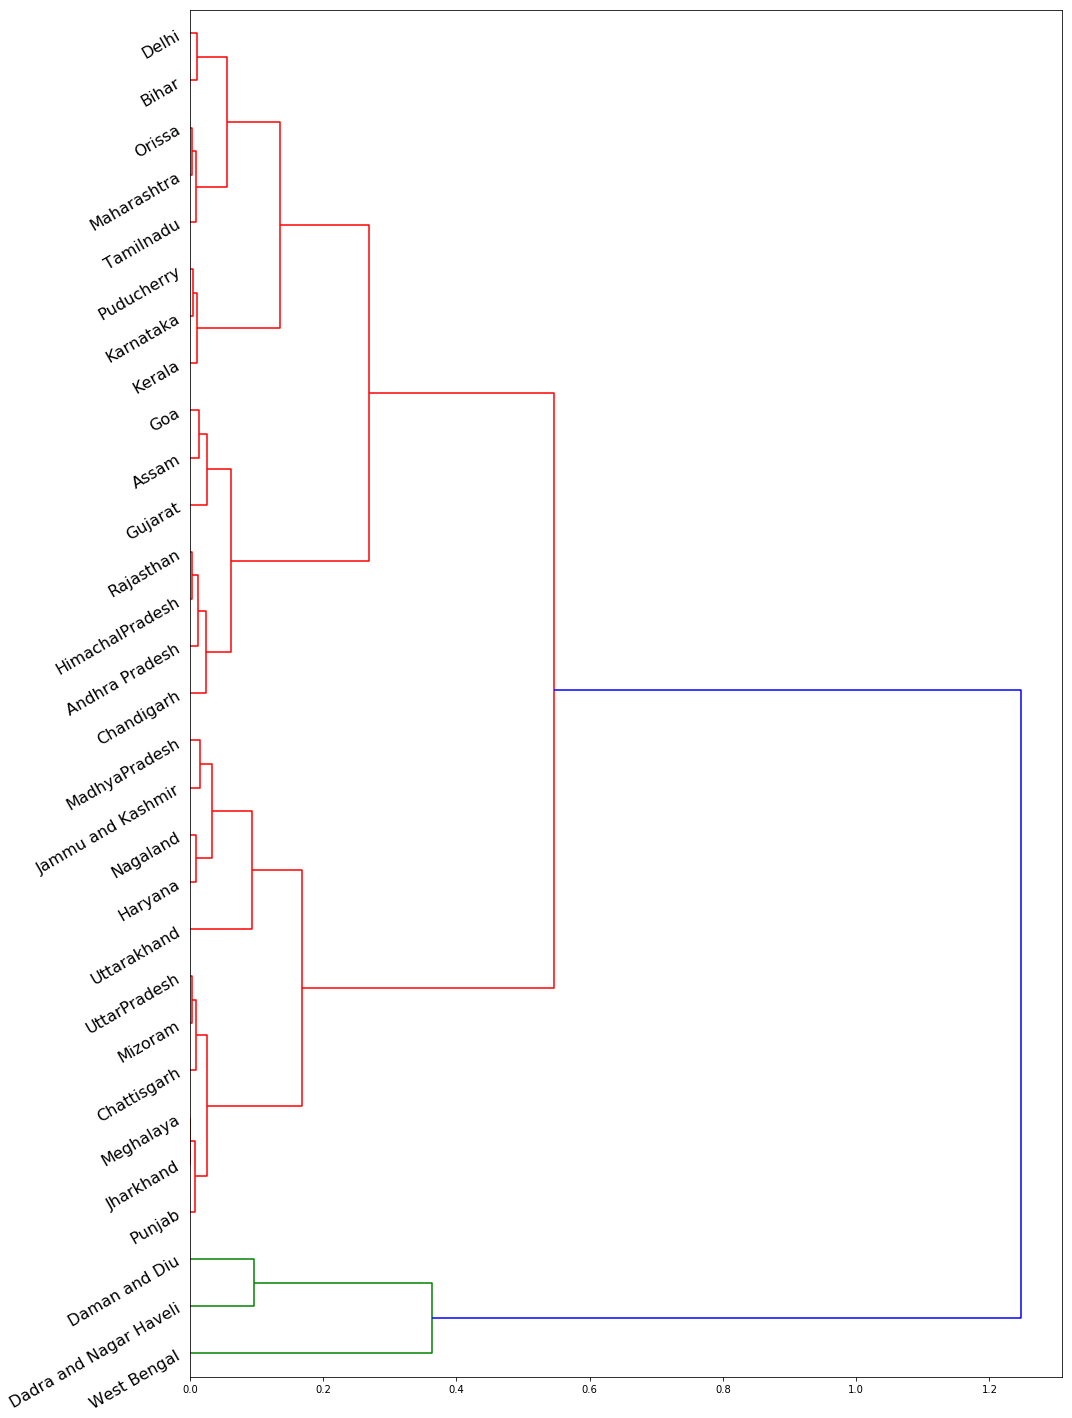

In [29]:
#Plot a Dendogram
fig, ax = plt.subplots(figsize=(15, 20))
ax=dendrogram(Z,orientation="right",labels=np.array(data_pol['State']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()